## Visual icesat1 data on the selected region.
### Taking tile-30-95 on year 2007 as example

In [1]:
import h5py
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
import numpy as np
import warnings
warnings.filterwarnings('ignore')

ERROR 1: PROJ: proj_create_from_database: Open of /home/xin/miniconda3/envs/venv-glacier/share/proj failed


In [2]:
path_hma_vec = 'data/boundary/hma_bolch2019.gpkg'
path_setp_vec = 'data/boundary/setp_zhao2022.gpkg'
path_glah14 = 'data/icesat/GLAH14-2007/tile-29-95/GLAH14_634_2119_002_0379_0_01_0001.H5'
path_glah14_tile = 'data/icesat/GLAH14-2007/tile-29-95/GLAH14_readout_merge_subs.H5'


### Read 1 icesat-1 glah14 data

In [16]:
!h5ls $path_glah14/Data_40HZ/Geolocation

d_lat                    Dataset {1086840/Inf}
d_lon                    Dataset {1086840/Inf}


In [17]:
keys = ['lon', 'lat', 'h', 't_dyr']   ## output variables
glah14 = {}
for key in keys: 
    glah14[key]=np.array([]); 
with h5py.File(path_glah14,'r') as f_glah14:
    glah14['lon'] = f_glah14['Data_40HZ/Geolocation/d_lon'][:]
    glah14['lat'] = f_glah14['Data_40HZ/Geolocation/d_lat'][:]
    glah14['h'] = f_glah14['Data_40HZ/Elevation_Surfaces/d_elev'][:]
    

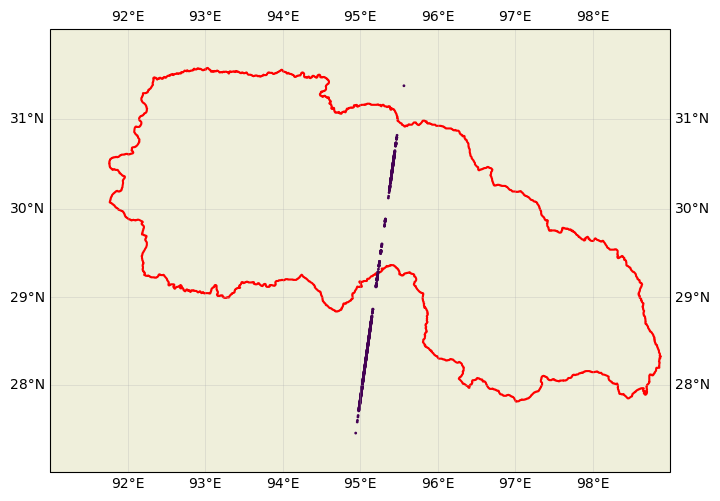

In [18]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
ax.set_extent([91, 99, 27.0, 32.0])
ax.add_feature(cfeature.LAND); 
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.4, zorder=1)
## 1. setp boundary
shp_fea = cfeature.ShapelyFeature(Reader(path_setp_vec).geometries(), \
                      crs=ccrs.PlateCarree(), edgecolor='red', linewidth=1.5, facecolor='none')
ax.add_feature(shp_fea, zorder=0)
## 2. icesat-1 data
ax.scatter(x=glah14['lon'], y=glah14['lat'], c=glah14['h'], s=1, transform=ccrs.PlateCarree(), zorder=0)


### Read 1-tile icesat-1 glah14 data


In [6]:
!h5ls $path_glah14_tile


h_cor                    Dataset {425}
h_orbit                  Dataset {425}
h_track                  Dataset {425}
lat                      Dataset {425}
lon                      Dataset {425}
t_dyr                    Dataset {425}


In [7]:
### read merged 1-tile icesat-1 data
keys = ['lon', 'lat', 'h', 't_dyr']   ## output variables
glah14_tile = {}
for key in keys: 
    glah14_tile[key]=np.array([]); 
with h5py.File(path_glah14_tile,'r') as f_glah14:
    glah14_tile['lon'] = f_glah14['lon'][:]
    glah14_tile['lat'] = f_glah14['lat'][:]
    glah14_tile['h'] = f_glah14['h_cor'][:]
    glah14_tile['t_dyr'] = f_glah14['t_dyr'][:]


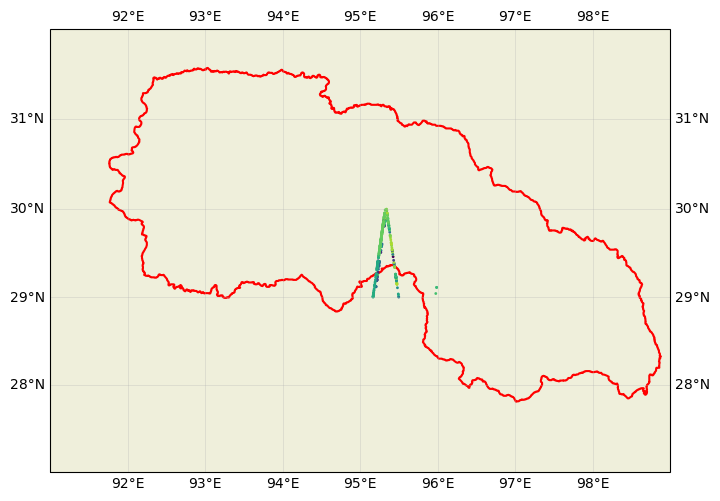

In [8]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
ax.set_extent([91, 99, 27.0, 32.0])
ax.add_feature(cfeature.LAND); 
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.4, zorder=1)
## 1. setp boundary
shp_fea = cfeature.ShapelyFeature(Reader(path_setp_vec).geometries(), \
                      crs=ccrs.PlateCarree(), edgecolor='red', linewidth=1.5, facecolor='none')
ax.add_feature(shp_fea, zorder=0)
## 2. icesat-1 data
ax.scatter(x=glah14_tile['lon'], y=glah14_tile['lat'], c=glah14_tile['h'], s=1, transform=ccrs.PlateCarree(), zorder=0)


